# Linear regression

Notebook inspired by https://github.com/aymericdamien/TensorFlow-Examples/

In this notebook we'll implement a linear regression with Tensorflow.

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

%matplotlib inline

In [41]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

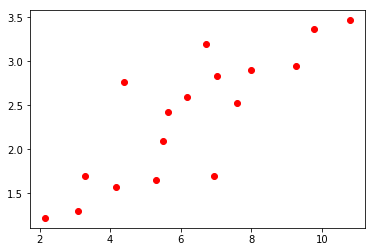

In [3]:
#Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')

A linear regression is a model of type:

    Y = X * W + b

First we set some global parameters like the learning rate and the number of epochs we want to run

In [4]:
learning_rate = 0.001
training_epochs = 1000

## Exercise 1

1. define input placeholders, assign them to variables named `X` and `Y`
- define model variables W and b and assign them names `W` and `b`
- construct a linear model of the form `pred = X * W + b`
- define the cost as the mean of the squared error between `Y` and `pred`. You will need the function `tf.reduce_mean`

In [61]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
print 'Before reshape:'
print 'train_X:', train_X.shape
print 'train_Y:', train_Y.shape

# That's ok before reshape:
# X = tf.placeholder("float")
# Y = tf.placeholder("float")
# 
# # Set model weights
# W = tf.Variable(rng.randn(), name="weight")
# b = tf.Variable(rng.randn(), name="bias")

train_X = train_X.reshape((17,1))
train_Y = train_Y.reshape((17,1))
print 'After reshape:'
print 'train_X:', train_X.shape
print 'train_Y:', train_Y.shape

X = tf.placeholder(tf.float32, [None, train_X.shape[1]])
Y = tf.placeholder(tf.float32, [None, train_Y.shape[1]])
W = tf.Variable(tf.zeros([train_X.shape[1], train_Y.shape[1]]))
b = tf.Variable(tf.zeros([train_Y.shape[1]]))
pred = tf.add(tf.matmul(X, W), b)


# X = tf.placeholder(tf.float32, [None, 1])
# Y = tf.placeholder(tf.float32, [None, 1])
# W = tf.Variable(tf.zeros([1,1]))
# b = tf.Variable(tf.zeros([1,1]))

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

Before reshape:
train_X: (17,)
train_Y: (17,)
After reshape:
train_X: (17, 1)
train_Y: (17, 1)


## Optimizer

In [62]:
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Running the model

In [63]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.140097708 W= [[ 0.32112804]] b= [ 0.04991483]
Epoch: 0100 cost= 0.111053109 W= [[ 0.35241237]] b= [ 0.05891847]
Epoch: 0150 cost= 0.110363066 W= [[ 0.3549476]] b= [ 0.06383924]
Epoch: 0200 cost= 0.109956920 W= [[ 0.35463443]] b= [ 0.06833059]
Epoch: 0250 cost= 0.109558389 W= [[ 0.35404214]] b= [ 0.07275515]
Epoch: 0300 cost= 0.109164692 W= [[ 0.35342571]] b= [ 0.077149]
Epoch: 0350 cost= 0.108775750 W= [[ 0.35281]] b= [ 0.08151584]
Epoch: 0400 cost= 0.108391486 W= [[ 0.35219774]] b= [ 0.08585623]
Epoch: 0450 cost= 0.108011879 W= [[ 0.35158929]] b= [ 0.09017034]


Epoch: 0500 cost= 0.107636854 W= [[ 0.35098442]] b= [ 0.09445833]
Epoch: 0550 cost= 0.107266337 W= [[ 0.35038325]] b= [ 0.0987204]
Epoch: 0600 cost= 0.106900297 W= [[ 0.34978575]] b= [ 0.10295667]
Epoch: 0650 cost= 0.106538668 W= [[ 0.34919178]] b= [ 0.1071673]
Epoch: 0700 cost= 0.106181391 W= [[ 0.34860149]] b= [ 0.11135245]
Epoch: 0750 cost= 0.105828464 W= [[ 0.34801468]] b= [ 0.11551228]
Epoch: 0800 cost= 0.105479777 W= [[ 0.34743151]] b= [ 0.11964694]
Epoch: 0850 cost= 0.105135299 W= [[ 0.34685183]] b= [ 0.12375657]
Epoch: 0900 cost= 0.104794957 W= [[ 0.3462756]] b= [ 0.12784132]


Epoch: 0950 cost= 0.104458734 W= [[ 0.34570301]] b= [ 0.1319014]
Epoch: 1000 cost= 0.104126573 W= [[ 0.34513378]] b= [ 0.13593687]
Optimization Finished!
Training cost= 0.104127 W= [[ 0.34513378]] b= [ 0.13593687] 



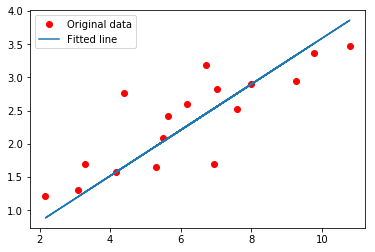

In [64]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):

        sess.run(optimizer, feed_dict={X: train_X, Y: train_Y})

        #Display logs per epoch step
        if (epoch+1) % 50 == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

## Exercise 2:

1. Try to change the learning rate. what happens?
- Try using a different optimizer. what happens?